In [1]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from itertools import product, combinations
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans

from Bio.Seq import Seq
from optimization.src.oracle import *
from optimization.src.encoding_utils import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

labels = ['A', 'C', 'G', 'T', 'AG', 'CT', 'AC', 'GT', 'GC', 'AT', 'ACT', 'GCT', 'ACG', 'AGT', 'ACGT']
labels2 = ['A', 'C', 'G', 'T', 'R', 'Y', 'M', 'K', 'S', 'W', 'H', 'B', 'V', 'D', 'N']
labels4 = ['A', 'C', 'G', 'T', 'AG  (R)', 'CT (Y)', 'AC (M)', 'GT (K)', 'GC (S)', 'AT (W)', 'ACT (H)', 'GCT (B)', 'ACG (V)', 'AGT (D)', 'ACGT (N)']

labels3 = []
for i in range(12):
    labels3 += [str(i) + 'A', str(i) + 'C', str(i) + 'G', str(i) + 'T']

In [2]:
ESM = np.load('/home/jyang4/repos/DeCOIL/data/MSA_transformer.npy')
manhattandistance(ESM[0,:], ESM[1,:])

0.021736085414886475

In [3]:
distances = []
for i in range(10000):
   choices = np.random.choice(149000, 2, replace=False)
   distances.append((manhattandistance(ESM[choices[0],:], ESM[choices[1],:])))

Text(0.5, 0, 'manhattan distance')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


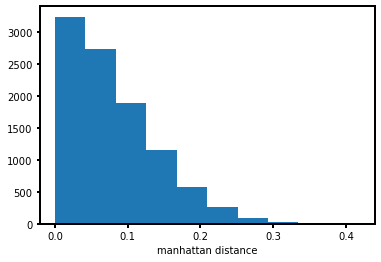

In [4]:
plt.hist(distances)
plt.xlabel('manhattan distance')

In [5]:
min(distances)

3.7550926208496094e-06

### Load the optimization results

In [2]:
results = np.load('optimization/saved/simple_exp1_GB1/results.npy', allow_pickle=True)
means = results.item()['means']
vars = results.item()['vars']
Xts = results.item()['Xts'].astype(int)

final_means = means[-1, :, :]
final_vars = vars[-1, :, :]

initial_encodings = Xts[0, :, :]
final_encodings = Xts[-1, :, :]
encoding2seq(final_encodings[131, :, 0])

# results = np.load('dclo/saved/simple_stochastic_exp010_mix2/results.npy', allow_pickle=True)
# means = results.item()['means']
# vars = results.item()['vars']
# Xts = results.item()['Xts'].astype(int)

# final_means = means[-1, :, :]
# final_vars = vars[-1, :, :]

# initial_encodings2 = Xts[0, :, :]
# final_encodings2 = Xts[-1, :, :]

# results = np.load('dclo/saved/simple_stochastic_exp25/results.npy', allow_pickle=True)
# means = results.item()['means']
# vars = results.item()['vars']
# Xts = results.item()['Xts'].astype(int)

# final_means = means[-1, :, :]
# final_vars = vars[-1, :, :]

# initial_encodings3 = Xts[0, :, :]
# final_encodings3 = Xts[-1, :, :]


'VTNNDYRVBRNT'

In [3]:
library_sizes, unique_indices, final_AA_encodings, unique_encodings, unique_AA_encodings = get_AA_encodings(final_encodings)

(183, 48, 1)


In [32]:
order = np.flip(np.argsort(final_means[:,0][unique_indices]))
order

array([ 26,  31,  95,  35,  32,  36,  33,  74,  38,  78,   3,  30,  37,
        29,  27,  23,  34,   4,   1,  96,  75,   5,  79,   2,   0,  50,
        98,   6,  77, 106,  81,  76,  97, 100,  72,  80,  22,  51,   7,
        46,  73,  47, 109,  24,  59,  44, 108,  55,  68,  86,  12,  39,
       103,  40,  87,  13,  69,  28,  84,  85, 110,  45,  42,  25,  43,
        88,  70,  60,  41,  52,  48,  63,   9,  53,  93,  49, 107,  83,
         8,  71,  21,  90,  94,  82,  56,  65, 102,  57,  66,  18,  67,
        19,  62,  61,  58,  99, 105, 101,  54, 104,  64,  16,  89,  20,
        91,  14,  92,  10,  17,  15,  11])

(array([10., 18., 24., 66., 20., 47., 47.,  2.,  3.,  3.]),
 array([2400., 2790., 3180., 3570., 3960., 4350., 4740., 5130., 5520.,
        5910., 6300.]),
 <BarContainer object of 10 artists>)

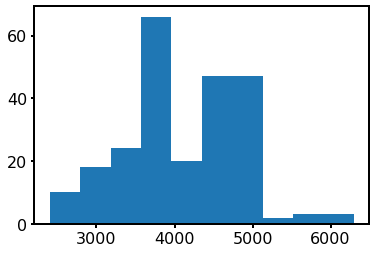

In [30]:
plt.hist(library_sizes)

In [31]:
encoding2seq(unique_encodings[order[1]])

'VNBRBYDTVDBB'

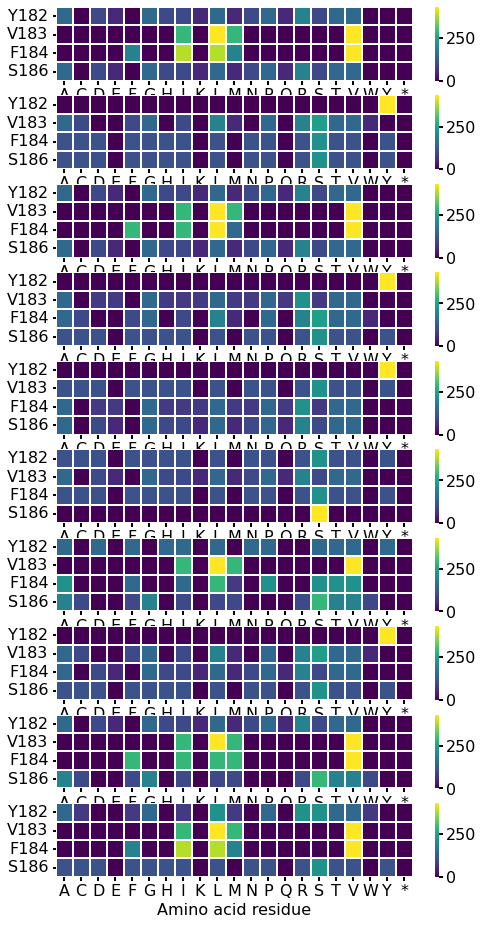

In [35]:
#labels = ['V39', 'D40', 'G41', 'V54']
labels = ['Y182', 'V183', 'F184', 'S186']

font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

#counts = counts.reindex(labels2)
plt.figure(figsize = (8,16))
full_order = [0, 4, 1, 5, 2 ,3, 11]

for i, index in enumerate(order[20:30]):
        data = unique_AA_encodings[index,:,0].reshape((4,21))

        plt.subplot(10,1,i+1)
        sns.heatmap(data, vmin = 0, vmax = 1728/4, yticklabels=labels, xticklabels=ALL_AAS, linewidths=2, cmap = 'viridis')
        plt.xlabel('Amino acid residue')

#plt.savefig('AAs0.jpg', dpi=500)

In [16]:
np.save('simple_stochastic_TrpB_exp25.npy', unique_encodings)

Get the best encodings and mix them together

In [25]:
results2 = np.load('dclo/saved/coverage_simple_stochastic_TrpB/results.npy', allow_pickle=True)
means2 = results2.item()['means']
final_means2 = means2[-1, :, :]
coverages = final_means2[:,0] #full coverage hamming
order = coverages.argsort()
ranks1 = order.argsort()

In [20]:
indices = np.where(ranks1 >= 230)[0]
indices

array([ 67,  77,  95, 140, 144, 168, 170, 185, 209, 230])

In [25]:
n_mix = 2
all_combos = list(combinations(indices, n_mix))
len(all_combos)

45

In [26]:
new_encodings = np.zeros((len(all_combos), 48, n_mix))

for i, combo in enumerate(all_combos):
    for j, index in enumerate(combo):
        new_encodings[i, :, j] = final_encodings[index, : , 0]

new_encodings

In [28]:
np.save('top10_mix2.npy', new_encodings)

Text(0.5, 0, 'total library size')

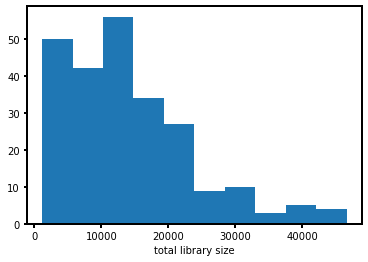

In [12]:
#calculating library sizes
sizes = []
for i in range(240):
    sizes.append(np.product(np.sum(final_encodings[i, :].reshape(12, 4), axis =1)))
plt.hist(sizes)
plt.xlabel('total library size')

### Linear regression to predict MLDE performance from the DC library embedding

In [11]:
x = final_encodings[:, :, 0]

In [22]:
y = all_maxes_medians.T

In [14]:
y.shape

(1, 80)

In [26]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)
y_pred = lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

[[-3.08855924e+12 -2.30398156e-01  2.55604903e+11  3.19686947e-02
  -1.51639861e-02 -1.97375348e-01 -1.22488352e-01  2.55604903e+11
  -6.35024463e-02  4.91364596e-02 -6.77184796e-02  3.89862323e-02
   2.55604903e+11 -4.61716021e-02 -7.31170996e-02  1.70403268e+11
   1.70403268e+11 -2.69760150e-02  2.55604903e+11  2.55604903e+11
   9.15527344e-05 -3.24958400e-04  1.70403268e+11 -1.77246236e-02
   6.39012257e+10  6.39012257e+10  2.55604903e+11 -2.92098309e-02
  -6.39012257e+10  6.39012257e+10  2.55604903e+11  0.00000000e+00
   1.48638154e-01  2.04102229e-02 -7.17216287e-02  3.14941973e-02
   2.55604903e+11  1.27802451e+11  2.55604903e+11 -6.21185193e-02
  -3.15366972e-02  1.27802451e+11 -2.78533421e-02  2.55604903e+11
   4.25697443e-02 -1.62168426e-02 -4.20195614e-02 -1.44713537e-02]]
0.0


SpearmanrResult(correlation=0.9168699721491654, pvalue=7.635588694635967e-33)


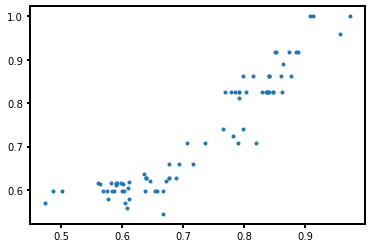

In [27]:
plt.plot(y_pred, y, '.')
print(spearmanr(y_pred, y))

In [32]:
x[:,5]

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

### Visualize the optimization trajectory

In [4]:
def trajectory_plot2(means):
    overall_means = np.mean(means, axis = 1)
    overall_stds = np.std(means, axis = 1)

    fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
    iters = 120
    ax1.set_xlim(0, iters)
    ax2.set_xlim(0, iters)
    #ax1.set_ylim(0, 160000)
    #ax2.set_ylim(0, 384)
    ax1.plot(overall_means[:,0], 'r')
    ax1.fill_between(list(range(iters)), overall_means[:,0] - overall_stds[:,0], overall_means[:,0] + overall_stds[:,0], alpha=0.3, facecolor='r')
    ax1.plot(overall_means[:,2], 'r--')
    ax1.fill_between(list(range(iters)), overall_means[:,2] - overall_stds[:,2], overall_means[:,2] + overall_stds[:,2], alpha=0.3, facecolor='r')
    plt.legend(['Score', 'Raw Score'], loc = 'lower right')

    ax2.plot(overall_means[:,3], 'b--')
    ax2.plot(overall_means[:,4], 'b-')
    ax2.fill_between(list(range(iters)), overall_means[:,4] - overall_stds[:,4], overall_means[:,4] + overall_stds[:,4], alpha=0.3, facecolor='b')
    ax2.fill_between(list(range(iters)), overall_means[:,3] - overall_stds[:,3], overall_means[:,3] + overall_stds[:,3], alpha=0.3, facecolor='b')

    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Overall Score", color='r')
    ax1.tick_params(axis="y", labelcolor='r')

    ax2.set_ylabel("Counts", color='b')
    ax2.set_xlabel("Iterations")
    ax2.tick_params(axis="y", labelcolor='b')

    plt.legend(['Top 25%', 'Unique'], loc = 'lower right')
    #plt.savefig('trajectory.jpg', dpi=500)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


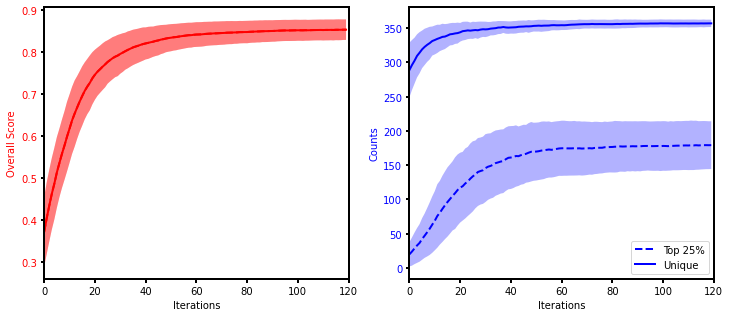

In [5]:
trajectory_plot2(means)

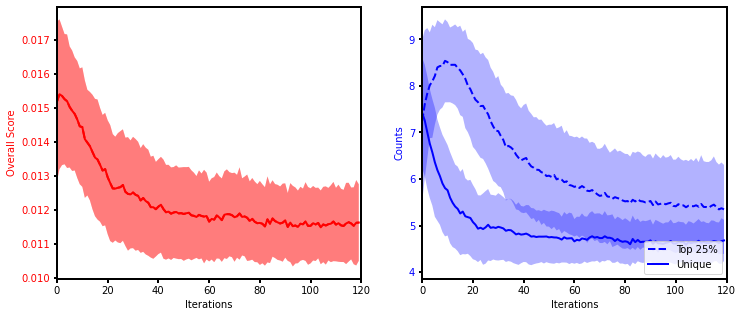

In [5]:
trajectory_plot2(np.sqrt(vars))

### Visualize the initital and final libraries
Analysis is independent but in reality, they effects are all coordinated

#### for analyzing how similar the AA distributions are to each other

In [12]:
pure_random_AA_encoding = np.ones((1, 84)) * 6912/84 #needs to be adjusted if you are ignoring stop codons

_, _, final_AA_encodings, _, _ = get_AA_encodings(final_encodings)

_, _, final_AA_encodings2, _, _ = get_AA_encodings(final_encodings2)

_, _, final_AA_encodings3, _, _ = get_AA_encodings(final_encodings3)

_, _, initial_AA_encodings, _, _ = get_AA_encodings(initial_encodings)

#for GB1 triad
swiftlib_encodings = np.zeros((31, 48, 1))
max10000 = ["DYANNSGSADNS", "NHCNNSGGADNS", "VNCNNSGGADNS", "VWSNNSGGADNS", "NNCNDSGGADNS", "VHCNNSGGANNS", "VHSNNSGGANNC", "DYSNNSGGADNS", "VHANNSGGANNS", "NBCNNSGGADNS"]
max40000 = ["NNSNNSGGANNS", "NHSNNSGSADNS", "NNSNDSGSADNS", "VNSNNSGSADNS", "VHSNNSGSANNS", "NNSDNSGSADNS", "DNSNNSGSADNS", "NDSNNSGSADNS", "NHSNDSGSANNS", "NNSNNSGSANNC"]
max160000 = ["NNSNNSKSCNNS", "NNSNNSRSCNNS", "NNSNNSKSCDNS", "NHSNNSKSCNNS", "NNSNDSKSCNNS", "VNSNNSKSCNNS", "NNSNNSGSANNS", "NNSNNSRSCDNS", "NNMNNSKSCNNS", "NNSDNSKSCNNS"]

for i, encoding in enumerate(max10000 + max40000 + max160000 + ["NNKNNKNNKNNK"]):
    swiftlib_encodings[i, :, :] = seq2encoding(encoding).T

_, _, swiftlib_AA_encodings, _, _ = get_AA_encodings(swiftlib_encodings)

#for GB1 ypred
# swiftlib_AA_encodings = np.zeros((10, 84))
# for i, encoding in enumerate([
#             "DNSNNCGCAGCA",
#             "WDSNNSGCAGCA",
#             "DKSNNSGCAGCA",
#             "NNSNDCGCAGCA",
#             "NDCNNSGCAGCA",
#             "VTANNSGCAGCA",
#             "NTCNDSGCAGCA",
#             "NTCDNSGCAGCA",
#             "DTSNNCGCAGCA",
#             "BTCNNSGCAGCA"
#         ],):
#     encoding = seq2encoding(encoding)
#     encoding = encoding.reshape(4, 12)
#     for j, row in enumerate(encoding):
#         swiftlib_AA_encodings[i,21*j:21*(j+1)] = np.array(list(mixedcodon2aaprobs(encoding).values()))

#for TrpB
# swiftlib_AA_encodings = np.zeros((3, 84))
# for i, encoding in enumerate(["TACNNSNNSDCA", "TACDNSNNSRSC", "TWCDNSNNSASC"]):
#     encoding = seq2encoding(encoding)
#     encoding = encoding.reshape(4, 12)
#     for j, row in enumerate(encoding):
#         swiftlib_AA_encodings[i,21*j:21*(j+1)] = np.array(list(mixedcodon2aaprobs(encoding).values()))

(78, 48, 1)
(240, 48, 2)
(122, 48, 1)
(240, 48, 1)
(31, 48, 1)


In [13]:
#all_encodings = np.concatenate((initial_encodings, final_encodings))
#all_encodings = np.concatenate((initial_AA_encodings, final_AA_encodings, final_TrpB_AA_encodings, swiftlib_AA_encodings, pure_random_AA_encoding))
all_encodings = np.concatenate((initial_AA_encodings[:,:,0], final_AA_encodings[:,:,0], final_AA_encodings2[:,:,1], final_AA_encodings3[:,:,0], np.squeeze(swiftlib_AA_encodings), pure_random_AA_encoding))

np.random.seed(42)
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(all_encodings)

#pca = PCA(n_components=2)
#transformed = pca.fit_transform(all_encodings)

/home/jyang4/miniconda3/envs/ProtGraphR/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jyang4/miniconda3/envs/ProtGraphR/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/home/jyang4/miniconda3/envs/ProtGraphR/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


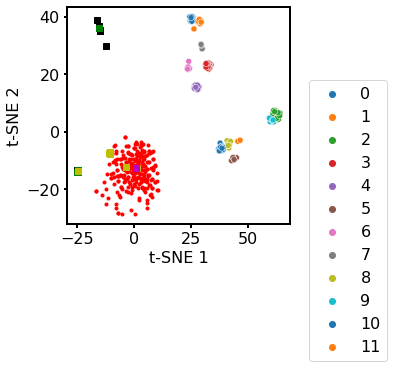

In [16]:
from mimetypes import init

font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

#pca = PCA(n_components=2)
#transformed = pca.fit_transform(initial_encodings)
#print(pca.explained_variance_ratio_)

plt.figure(figsize = (4, 4))
#plt.tight_layout()
#plt.subplot(1, 2, 1)

plt.plot(transformed[:240,0], transformed[:240,1], '.r')
#plt.plot(transformed[240:480,0], transformed[240:480,1], '.b')
#plt.plot(transformed[480:720,0], transformed[480:720,1], '.c')
#plt.plot(transformed[720:960,0], transformed[720:960,1], '.m')

plt.plot(transformed[-32:-22,0], transformed[-32:-22,1], 'ks')
plt.plot(transformed[-22:-12,0], transformed[-22:-12,1], 'gs')
plt.plot(transformed[-12:-2,0], transformed[-12:-2,1], 'ys')
plt.plot(transformed[-2,0], transformed[-2,1], 'ys')
plt.plot(transformed[-1,0], transformed[-1,1], 'ms')

results2 = np.load('dclo/saved/coverage_simple_stochastic/results.npy', allow_pickle=True)
means2 = results2.item()['means']
final_means2 = means2[-1, :, :]
coverages = final_means2[:,0] #full coverage hamming
order = coverages.argsort()
ranks1 = order.argsort()

#sns.scatterplot(transformed[720:960,0], transformed[720:960,1], hue=all_maxes_medians.reshape(-1))

# results2 = np.load('dclo/saved/coverage_simple_stochastic/results.npy', allow_pickle=True)
# means2 = results2.item()['means']
# final_means2 = means2[-1, :, :]
# coverages = final_means2[:,0]
#sns.scatterplot(transformed[720:960,0], transformed[720:960,1], hue=coverages)

#sns.scatterplot(transformed[240:-5,0], transformed[240:-5,1], hue=medians)
sns.scatterplot(transformed[240:480,0], transformed[240:480,1], hue=clusters, palette='tab10')


plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#plt.title('Initial Libraries')
#plt.xlim(-2, 2)
#plt.ylim(-2, 2)

# pca = PCA(n_components=2)
# transformed = pca.fit_transform(final_encodings)
# print(pca.explained_variance_ratio_)

# tsne = TSNE(n_components=2)
# transformed = tsne.fit_transform(final_encodings)

# plt.subplot(1, 2, 2)


#plt.plot(transformed[245,0], transformed[245,1], 'go')
#plt.plot(transformed[249,0], transformed[249,1], 'go')

# plt.xlabel('t-SNE 1')
# plt.title('Optimized Libraries')
#plt.xlim(-2, 2)
#plt.ylim(-2, 2)

#plt.legend(['Initial Libraries', 'Optimized Libraries', 'Case Studies'], bbox_to_anchor = (1.05, 0.7))
plt.legend(bbox_to_anchor = (1.05, 0.7))
#plt.savefig('tSNE.png', dpi = 500, bbox_inches='tight')

In [15]:
model = KMeans(12)
clusters = model.fit_predict(transformed[240:480])
clusters

array([ 1,  0,  3,  6,  3,  3,  4,  4,  2,  4,  8,  0,  4,  3, 10,  4,  2,
        2,  2,  6,  1,  2, 10,  5, 10,  2,  0,  2,  0,  0, 11,  4,  3,  5,
       10,  3, 10,  8,  9,  9,  3, 10,  8,  4,  9,  0,  5,  9,  7,  6,  7,
        0,  1, 10,  0,  5,  6,  3, 10,  4,  9,  4,  4,  4,  9, 10,  3,  1,
        4, 10,  1,  7,  0,  3,  2,  8,  6,  0,  1,  4, 10, 10,  3,  1, 10,
        3,  9,  0,  7,  2,  1,  3,  3,  4,  1,  2,  0,  1,  4,  7,  5,  3,
        6,  4,  8,  2,  0,  4,  5,  6,  0,  5,  0,  8,  7,  6,  5,  3,  5,
        0,  3,  1,  0,  0,  2,  1, 10,  2,  2,  1,  9,  6,  6,  8,  9,  2,
        2,  1,  0, 10, 10,  8,  1,  2,  5,  8, 10,  0,  3,  3,  6, 11,  0,
        2,  6,  3,  4,  3,  0, 10,  4,  4,  6, 11,  3,  1, 10,  3,  3,  8,
        0,  4,  2,  3,  2,  2,  3,  5,  8,  6,  5,  5,  4,  6,  8,  1,  1,
        8,  9,  0,  9,  4,  4,  1,  1, 10,  1,  0,  0,  5,  2,  6, 10,  8,
        4,  8,  5,  4,  3,  2,  9,  3,  0,  2,  5,  2,  5,  3, 10,  0,  1,
        2,  2,  3, 10,  9

In [219]:
df = pd.DataFrame()
df['AAencoding1'] = list(final_AA_encodings[:,:,0])
df['AAencoding2'] = list(final_AA_encodings[:,:,1])
df['Cluster1'] = clusters[:240]
df['Cluster2'] = clusters[240:]
df['Boosting Max'] = all_maxes_medians.T

results2 = np.load('dclo/saved/coverage_simple_stochastic_mix2/results.npy', allow_pickle=True)
means2 = results2.item()['means']
final_means2 = means2[-1, :, :]
coverages = final_means2[:,0]

df['Coverage'] = coverages
df['tSNE1'] = list(transformed[240:480])
df['tSNE2'] = list(transformed[480:720])
df['distance'] = df.apply(lambda x: math.dist(x.tSNE1, x.tSNE2), axis=1)
df['full_distance'] = df.apply(lambda x: math.dist(x.AAencoding1, x.AAencoding2), axis=1)
df

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2,distance,full_distance
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...","[192.0, 128.0, 0.0, 0.0, 128.0, 192.0, 0.0, 12...",7,2,0.617493,23.244197,"[-26.09448, 13.99217]","[53.286095, -2.1562438]",81.006463,1464.502646
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...",7,3,0.707733,23.353671,"[-24.00987, 13.519274]","[-24.172789, -1.7338996]",15.254043,1444.393298
2,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 216.0,...",2,0,0.687614,23.681335,"[52.626415, 6.3773384]","[10.970732, -11.692252]",45.406014,1240.387036
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 384.0, 0.0...","[288.0, 0.0, 0.0, 0.0, 192.0, 0.0, 0.0, 288.0,...",7,0,0.862463,22.953738,"[-24.019543, 7.8174706]","[8.821808, -4.9138837]",35.222744,1415.389699
4,"[288.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 288.0, 0...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",0,6,0.825004,23.627419,"[5.1837177, -5.3372426]","[38.894146, 13.482553]",38.608000,1296.888584
...,...,...,...,...,...,...,...,...,...,...
235,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...",2,1,0.658760,22.534080,"[44.359184, 2.343974]","[29.829584, 45.656666]",45.684774,1603.516136
236,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....",3,5,0.825004,23.670006,"[-24.419033, -1.8264208]","[-5.0754743, 9.437583]",22.384170,1167.427942
237,"[216.0, 0.0, 72.0, 144.0, 0.0, 216.0, 0.0, 144...","[216.0, 0.0, 216.0, 0.0, 0.0, 216.0, 0.0, 216....",0,3,0.794447,22.911613,"[-0.93521804, -10.4958935]","[-28.708641, 0.8066234]",29.985162,1246.152479
238,"[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 144.0,...","[0.0, 0.0, 128.0, 64.0, 0.0, 192.0, 128.0, 128...",0,4,0.707733,23.712017,"[10.06345, -10.251858]","[-5.2175155, 42.185116]",54.618166,1244.405079


In [227]:
df['Coverage Rank'] = df['Coverage'].rank(ascending=False)
df['Distance Rank'] = df['distance'].rank(ascending=False)
df['Score'] = df['Coverage Rank'] + df['Distance Rank']

In [230]:
df.sort_values(by='Score')

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2,distance,full_distance,Coverage Rank,Distance Rank,Score
123,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[192.0, 96.0, 0.0, 0.0, 96.0, 192.0, 0.0, 96.0...",3,2,0.620935,23.891543,"[-21.468767, -1.0428566]","[50.093643, -6.6015882]",71.777978,1472.825855,9.0,26.0,35.0
7,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....","[192.0, 128.0, 0.0, 0.0, 128.0, 192.0, 0.0, 12...",4,2,0.707733,23.687387,"[-7.4123287, 49.26789]","[49.558144, -4.6645484]",78.449619,1553.442628,31.0,10.0,41.0
203,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[192.0, 128.0, 0.0, 0.0, 128.0, 192.0, 0.0, 12...",2,3,0.579242,23.783709,"[45.133095, 2.141658]","[-24.329426, -3.5041726]",69.691586,1432.290473,20.0,31.0,51.0
37,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[144.0, 144.0, 144.0, 0.0, 144.0, 144.0, 0.0, ...",5,2,0.862211,23.886766,"[-9.840033, 2.2111223]","[57.173042, 0.50591934]",67.034767,1292.439554,11.0,43.0,54.0
179,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....",2,4,0.707733,23.633468,"[54.00764, 5.179919]","[-6.625497, 48.162216]",74.322643,1489.547582,41.0,17.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 288....","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 16...",2,2,0.598350,22.894687,"[44.408455, 1.1046387]","[54.014908, 5.0585136]",10.388314,694.809326,199.0,232.0,431.0
122,"[144.0, 144.0, 144.0, 0.0, 144.0, 144.0, 0.0, ...","[0.0, 0.0, 96.0, 96.0, 0.0, 192.0, 96.0, 96.0,...",6,6,0.598350,22.807631,"[39.78919, 19.35272]","[40.083176, 14.29354]",5.067715,874.601624,208.0,238.0,446.0
80,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 21...","[144.0, 144.0, 144.0, 0.0, 144.0, 144.0, 0.0, ...",2,2,0.600127,22.657523,"[52.705395, 7.3794713]","[58.668625, 3.705927]",7.003930,979.746906,218.0,237.0,455.0
169,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 432.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...",7,7,0.825004,22.308790,"[-13.397488, 10.4982]","[-26.964125, 12.267299]",13.681497,1013.129804,229.0,226.0,455.0


SpearmanrResult(correlation=-0.15506660563106045, pvalue=0.016203444424285843)

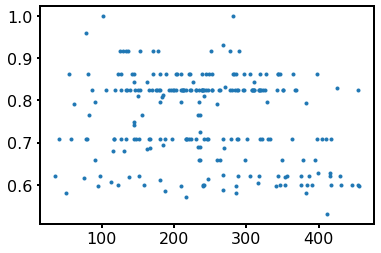

In [231]:
plt.plot(df['Score'], df['Boosting Max'], '.')
spearmanr(df['Score'], df['Boosting Max'])

In [222]:
df.sort_values(by='Boosting Max', ascending=False)[20:30]

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2,distance,full_distance
159,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 0.0, 0.0, 0.0, 288.0, 0.0, 0.0, 432.0, 0...",4,7,0.862211,23.375486,"[-2.4100146, 54.952232]","[-14.793887, 13.606204]",43.160797,1394.067430
37,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[144.0, 144.0, 144.0, 0.0, 144.0, 144.0, 0.0, ...",5,2,0.862211,23.886766,"[-9.840033, 2.2111223]","[57.173042, 0.50591934]",67.034767,1292.439554
172,"[0.0, 0.0, 96.0, 192.0, 0.0, 0.0, 96.0, 192.0,...","[288.0, 0.0, 0.0, 0.0, 192.0, 0.0, 0.0, 192.0,...",5,0,0.862211,23.888760,"[-5.082638, 9.414792]","[8.083964, -10.476075]",23.853847,957.596992
170,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 288.0, 0.0...","[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 144.0,...",7,0,0.862211,23.352034,"[-23.407356, 11.03436]","[4.1634583, -12.247053]",36.085648,1136.394298
94,"[192.0, 96.0, 0.0, 0.0, 96.0, 192.0, 0.0, 96.0...","[0.0, 216.0, 0.0, 0.0, 216.0, 216.0, 0.0, 216....",2,0,0.862211,22.936016,"[51.910408, 7.5154448]","[12.859215, -4.6395736]",40.899146,950.351514
128,"[192.0, 192.0, 0.0, 0.0, 192.0, 192.0, 0.0, 19...","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...",0,4,0.862211,23.188071,"[2.0813766, -4.1833773]","[-2.402425, 54.92739]",59.280582,1363.149295
154,"[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...","[288.0, 0.0, 96.0, 192.0, 0.0, 0.0, 0.0, 192.0...",2,0,0.862211,23.674847,"[45.836147, 7.1849036]","[-1.0758406, -11.398999]",50.458855,1319.781800
145,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...","[192.0, 96.0, 0.0, 0.0, 96.0, 192.0, 0.0, 96.0...",7,2,0.862211,23.299331,"[-27.316668, 14.433785]","[55.864677, -2.3714614]",84.861961,1613.542686
105,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",6,5,0.862211,23.608158,"[42.147797, 7.175635]","[-8.730868, -7.681757]",53.003591,1303.119335
139,"[0.0, 0.0, 96.0, 192.0, 0.0, 0.0, 96.0, 192.0,...","[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 288.0,...",5,0,0.862211,23.451206,"[-11.239722, 4.485506]","[9.128067, -3.5685623]",21.902394,1110.358501


In [213]:
df_new = df[df['Cluster1'].isin([2,4])]
df_new = df_new[df_new['Cluster2'].isin([2,4])]
df_new

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2,distance
7,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....","[192.0, 128.0, 0.0, 0.0, 128.0, 192.0, 0.0, 12...",4,2,0.707733,23.687387,"[-7.4123287, 49.26789]","[49.558144, -4.6645484]",78.449619
10,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",4,2,0.707733,23.308546,"[-0.9975643, 48.86628]","[46.729, 7.996921]",62.834142
12,"[192.0, 96.0, 0.0, 0.0, 96.0, 192.0, 0.0, 96.0...","[192.0, 96.0, 0.0, 0.0, 96.0, 192.0, 0.0, 96.0...",2,4,0.812962,23.114873,"[50.093838, -6.6016326]","[-0.508363, 46.8971]",73.638964
18,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 288....","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 16...",2,2,0.598350,22.894687,"[44.408455, 1.1046387]","[54.014908, 5.0585136]",10.388314
27,"[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 144.0,...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",2,4,0.790720,23.619937,"[51.545692, -6.394961]","[-5.277692, 42.688644]",75.087265
35,"[0.0, 0.0, 64.0, 128.0, 0.0, 192.0, 64.0, 128....","[144.0, 144.0, 144.0, 0.0, 144.0, 144.0, 0.0, ...",2,4,0.918190,23.334775,"[44.26884, 6.4580975]","[-1.0341753, 50.695877]",63.319384
52,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",2,4,0.707733,23.273155,"[47.989975, -6.3818946]","[-4.037284, 46.056797]",73.869155
66,"[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 288.0,...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",4,2,0.918190,23.519496,"[1.0496267, 47.334126]","[47.670467, 7.3584003]",61.413039
72,"[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...","[216.0, 0.0, 72.0, 144.0, 0.0, 216.0, 0.0, 144...",2,4,0.707733,23.486911,"[45.835354, 7.18506]","[-2.000921, 50.405277]",64.469344
74,"[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...","[0.0, 216.0, 0.0, 0.0, 216.0, 216.0, 0.0, 216....",4,2,0.707733,22.991617,"[-4.7186527, 44.459126]","[44.475616, -4.4680896]",69.382624


In [187]:
df1 = df[df['Cluster1'].isin([0,5])]
df2 = df[df['Cluster2'].isin([0,5])]

In [218]:
df[df['Cluster1'] != df['Cluster2']]

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2,distance
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...","[192.0, 128.0, 0.0, 0.0, 128.0, 192.0, 0.0, 12...",7,2,0.617493,23.244197,"[-26.09448, 13.99217]","[53.286095, -2.1562438]",81.006463
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...",7,3,0.707733,23.353671,"[-24.00987, 13.519274]","[-24.172789, -1.7338996]",15.254043
2,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 216.0,...",2,0,0.687614,23.681335,"[52.626415, 6.3773384]","[10.970732, -11.692252]",45.406014
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 384.0, 0.0...","[288.0, 0.0, 0.0, 0.0, 192.0, 0.0, 0.0, 288.0,...",7,0,0.862463,22.953738,"[-24.019543, 7.8174706]","[8.821808, -4.9138837]",35.222744
4,"[288.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 288.0, 0...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",0,6,0.825004,23.627419,"[5.1837177, -5.3372426]","[38.894146, 13.482553]",38.608000
...,...,...,...,...,...,...,...,...,...
235,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....","[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...",2,1,0.658760,22.534080,"[44.359184, 2.343974]","[29.829584, 45.656666]",45.684774
236,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....",3,5,0.825004,23.670006,"[-24.419033, -1.8264208]","[-5.0754743, 9.437583]",22.384170
237,"[216.0, 0.0, 72.0, 144.0, 0.0, 216.0, 0.0, 144...","[216.0, 0.0, 216.0, 0.0, 0.0, 216.0, 0.0, 216....",0,3,0.794447,22.911613,"[-0.93521804, -10.4958935]","[-28.708641, 0.8066234]",29.985162
238,"[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 144.0,...","[0.0, 0.0, 128.0, 64.0, 0.0, 192.0, 128.0, 128...",0,4,0.707733,23.712017,"[10.06345, -10.251858]","[-5.2175155, 42.185116]",54.618166


In [193]:
combined = pd.concat((df1, df2))
combined = combined.drop_duplicates(subset=['Cluster1', 'Cluster2'])
combined

,AAencoding1,AAencoding2,Cluster1,Cluster2,Boosting Max,Coverage,tSNE1,tSNE2
4,"[288.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 288.0, 0...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",0,6,0.825004,23.627419,"[5.1837177, -5.3372426]","[38.894146, 13.482553]"
9,"[288.0, 0.0, 0.0, 0.0, 96.0, 0.0, 0.0, 192.0, ...","[0.0, 0.0, 96.0, 96.0, 0.0, 192.0, 96.0, 144.0...",0,2,0.766369,23.459237,"[3.952513, -14.753521]","[40.39233, 2.5256345]"
14,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....","[288.0, 0.0, 0.0, 0.0, 192.0, 0.0, 0.0, 192.0,...",5,0,0.825004,23.985094,"[-8.676963, 1.6746804]","[9.230411, -3.349761]"
21,"[0.0, 0.0, 192.0, 96.0, 0.0, 0.0, 192.0, 192.0...","[216.0, 0.0, 144.0, 72.0, 0.0, 216.0, 0.0, 144...",5,2,0.825004,23.681555,"[-3.2635891, 2.420505]","[50.721638, -1.3470767]"
24,"[288.0, 0.0, 144.0, 144.0, 0.0, 0.0, 0.0, 144....","[0.0, 0.0, 192.0, 96.0, 0.0, 0.0, 192.0, 192.0...",0,5,0.825004,23.572337,"[11.609349, -4.2731476]","[-9.179663, 5.901541]"
25,"[216.0, 0.0, 108.0, 108.0, 0.0, 216.0, 0.0, 10...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...",0,7,0.825004,23.182959,"[7.7370033, 0.19566794]","[-27.703453, 14.68657]"
36,"[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 576.0, 0.0...",5,7,0.825004,23.272661,"[-2.2876036, 1.2254747]","[-25.260899, 13.246671]"
43,"[288.0, 0.0, 0.0, 0.0, 192.0, 0.0, 0.0, 192.0,...","[0.0, 0.0, 96.0, 96.0, 0.0, 192.0, 96.0, 96.0,...",0,1,0.825004,23.078333,"[6.2561812, -11.238666]","[24.608175, 45.41338]"
45,"[288.0, 0.0, 0.0, 0.0, 144.0, 0.0, 0.0, 144.0,...","[0.0, 144.0, 144.0, 0.0, 144.0, 144.0, 144.0, ...",0,4,0.825004,23.472388,"[7.232647, 2.4735155]","[-5.6446257, 43.8753]"
48,"[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 216....","[0.0, 0.0, 144.0, 144.0, 0.0, 0.0, 144.0, 144....",5,5,0.825004,23.498256,"[-3.2065103, 6.285175]","[-7.362859, 4.4055214]"


In [223]:
np.mean(combined['Boosting Max'])

0.8044385383257517

In [164]:
import math
df['distance'] = math.dist(df['tSNE1'].values, df['tSNE2'].values)

In [165]:
math.dist(df['tSNE1'].values, df['tSNE2'].values)

TypeError: only size-1 arrays can be converted to Python scalars

In [8]:
all_initial_distances = []
all_final_distances = []
for combo in list(product(range(240), range(240))):
    all_initial_distances.append(sum([a != b for a,b in zip(initial_encodings[combo[0],:], initial_encodings[combo[1],:])]))
    all_final_distances.append(sum([a != b for a,b in zip(final_encodings[combo[0],:], final_encodings[combo[1],:])]))

In [11]:
np.mean(all_final_distances)

14.112465277777778

In [12]:
np.mean(all_initial_distances)

22.093958333333333

In [10]:
font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

plt.figure(figsize = (12, 5))
sns.histplot(all_initial_distances, color='r', discrete = True)
sns.histplot(all_final_distances, color='b', discrete=True)
plt.xlabel('hamming distance')
plt.legend(['Initial Libraries', 'Optimized Libraries'])

#plt.savefig('both_hamming.jpg', dpi=500)

KeyboardInterrupt: 

Text(0.5, 24.0, 'Nucleotide Position')

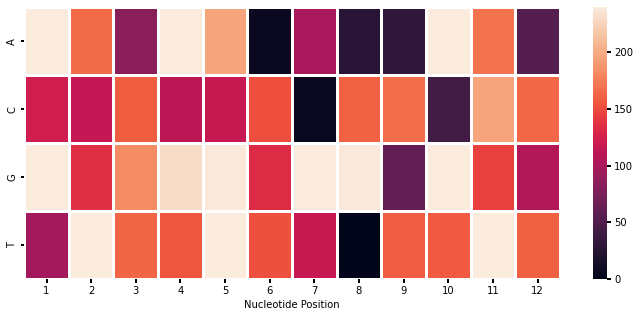

In [6]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = np.sum(final_encodings, axis = 0).reshape(-1, 4).T, vmin = 0, vmax=240, yticklabels=['A', 'C', 'G', 'T'], xticklabels=np.arange(1, 13), linewidths=3)
plt.xlabel('Nucleotide Position')
#plt.savefig('dist1.jpg', dpi=500)

In [8]:
initial_seqs = []
final_seqs = []
for encoding in initial_encodings:
    initial_seqs.append(encoding2seq(encoding))
for encoding in final_encodings:
    final_seqs.append(encoding2seq(encoding))
    
initial_df = pd.DataFrame()
for i in range(len(initial_seqs[0])):
    initial_df[i] = [seq[i] for seq in initial_seqs]
final_df = pd.DataFrame()
for i in range(len(final_seqs[0])):
    final_df[i] = [seq[i] for seq in final_seqs]

Text(0.5, 51.0, 'Nucleotide Position')

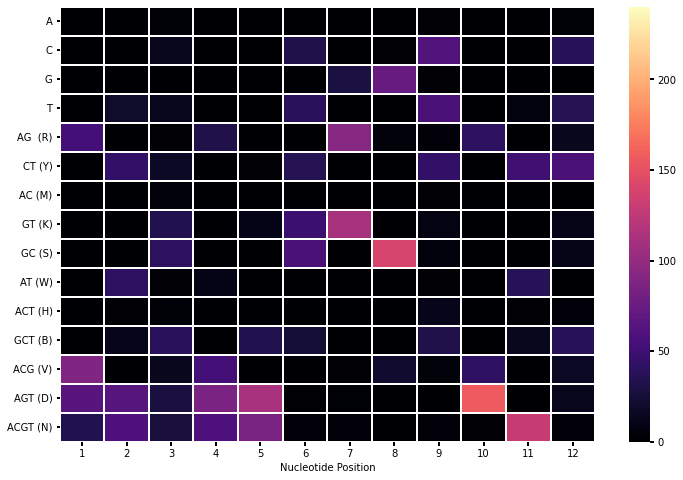

In [9]:
from matplotlib.pyplot import colorbar

counts = final_df.apply(pd.value_counts).fillna(0)
counts = counts.reindex(labels2)
plt.figure(figsize = (12, 8))
sns.heatmap(counts, vmin = 0, vmax = 240,xticklabels=np.arange(1, 13), yticklabels=labels4, linewidths=2, cmap='magma')
plt.xlabel('Nucleotide Position')

#plt.savefig('dist3.jpg', dpi=500)

### Visualize the protein distributions of initial and final libraries

In [113]:
results = np.load('dclo/saved/simple_stochastic_exp25_mix2/results.npy', allow_pickle=True)
#results = np.load('dclo/saved/simple_stochastic_TrpB_exp25/results.npy', allow_pickle=True)
means = results.item()['means']
vars = results.item()['vars']
Xts = results.item()['Xts'].astype(int)

final_means = means[-1, :, :]
final_vars = vars[-1, :, :]

initial_encodings = Xts[0, :, :]
final_encodings = Xts[-1, :, :]
#encoding2seq(final_encodings[0, :])

In [116]:
final_encodings.shape

(240, 48, 2)

In [5]:
# with open('/home/jyang4/repos/StARDUST/dclo/configs/simple_stochastic.json', 'r') as f:
#     config = json.load(f)

with open('/home/jyang4/repos/StARDUST/dclo/saved/simple_stochastic_TrpB/simple_stochastic_TrpB.json', 'r') as f:
    config = json.load(f)

oracle = Oracle(config['data_config'], config['opt_config'], verbose = True)
best_index = final_means[:,0].argmax()
best_encoding = seq2encoding('VNNNBBVNBTCC').reshape(1, final_encodings.shape[1], final_encodings.shape[2])
#VNNNBBVNBTCC
#TATNBBVNBVNB
#best_encoding = final_encodings[best_index, :, :].reshape(1, final_encodings.shape[1], final_encodings.shape[2])
# oracle.aas2zs(oracle.sample(best_encoding), n_samples=384, seed=42 )

means, vars, seqs = oracle.predict(best_encoding)

#pooled = seqs.reshape((100, -1))
pooled = seqs.reshape((1, -1))
pooled_df = pd.DataFrame(pooled.T)

#best_df = pd.DataFrame(seqs[65,:,:])

best_df2 = pd.DataFrame(pooled_df[0])
best_df2.columns = ['Combo']
best_df2

,Combo
0,PFSS
1,EPVS
2,HCNS
3,LLVS
4,IAPS
...,...
38395,IMAS
38396,VSPS
38397,TLVS
38398,QRHS


In [212]:
# #seeing the distrubtion of proteins lying above a certain fitness
# top = fitness_df[fitness_df['fit'] > 0.1]['fit']
# print(len(top))
# plt.hist(top)

SpearmanrResult(correlation=0.46396865953388916, pvalue=3.25278333857382e-14)


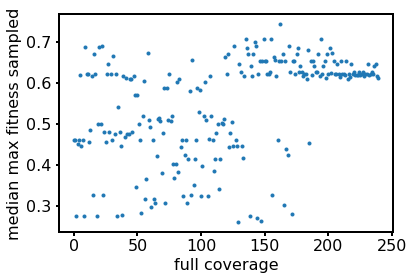

In [215]:
#simple score
#x = final_means2[:, 1]
results2 = np.load('dclo/saved/coverage_simple_stochastic/results.npy', allow_pickle=True)
means2 = results2.item()['means']
final_means2 = means2[-1, :, :]
coverages = final_means2[:,0] #full coverage hamming
order = coverages.argsort()
ranks1 = order.argsort()

# results2 = np.load('dclo/saved/coverage_simple_stochastic_ESM2/results.npy', allow_pickle=True)
# means2 = results2.item()['means']
# final_means2 = means2[-1, :, :]
# coverages = final_means2[:,0] #full coverage manhattan
# order = coverages.argsort()
# ranks3 = order.argsort()

#complete coverage score is index 0
x =  ranks1
#x = library_sizes
#x = np.median(unique, axis = 0)
y =  medians

#y = ranks3

plt.plot(x, y, '.')
plt.xlabel('full coverage')
plt.ylabel('median max fitness sampled')
plt.legend
print(spearmanr(x, y))
#print(spearmanr(x[:, 1], y))

In [8]:
df = pd.read_csv('/home/jyang4/repos/StARDUST/data/GB1_all_triad.csv')
df = df.sort_values("Score")
df['ranked_zs'] = df["Score"].rank(ascending=False)/len(df)
df

,Score,Seq,Muts,Combo,ranked_zs
0,-192.06766,IW--,A_39I+A_40W,IWGV,1.000000
1,-191.95202,-W--,A_40W,VWGV,0.999994
2,-191.82605,IH--,A_39I+A_40H,IHGV,0.999988
3,-191.52986,IY--,A_39I+A_40Y,IYGV,0.999981
4,-191.41892,IC--,A_39I+A_40C,ICGV,0.999975
...,...,...,...,...,...
149356,22.50158,PPPR,A_39P+A_40P+A_41P+A_54R,PPPR,0.000031
149357,23.14910,YPPP,A_39Y+A_40P+A_41P+A_54P,YPPP,0.000025
149358,24.13681,YPPR,A_39Y+A_40P+A_41P+A_54R,YPPR,0.000019
149359,31.02280,WPPP,A_39W+A_40P+A_41P+A_54P,WPPP,0.000013


In [9]:
fitness_df.sort_values(by='fit', ascending=False)

NameError: name 'fitness_df' is not defined

In [69]:
# fitness_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/GB1/fitness.csv')
# triad_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/GB1/GB1_all_triad.csv')
# triad_df['rank'] = triad_df['Triad Score'].rank()

# fitness_df['fit_rank'] = fitness_df['fit'].rank(ascending=False)
# fitness_df.sort_values(by='fit', ascending=False)

# merged = best_df2.merge(triad_df[['rank', 'Combo']], left_on = 'Combo', right_on='Combo')
# merged = merged.merge(fitness_df[['fit_rank', 'Combo']], left_on = 'Combo', right_on='Combo', how='left')
# merged

#can use the independent or somewhat indpendent fitness measurements (but site 4 is in a separate library so its not the best benchmark)

#fitness_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/tm9d8s/sim_fitness.csv')

fitness_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/tm9d8s/sim_indep_fitness.csv')
fitness_df['fit_rank'] = fitness_df['fit'].rank(ascending=False)
fitness_df.sort_values(by='fit', ascending=False)
triad_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/tm9d8s/tm9d8s_all_evmutation.csv')
triad_df['rank'] = triad_df['EVMutation Rank'].rank()
merged = best_df2.merge(triad_df[['rank', 'Combo']], left_on = 'Combo', right_on='Combo')
merged = merged.merge(fitness_df[['fit_rank', 'Combo']], left_on = 'Combo', right_on='Combo', how='left')
merged

,Combo,rank,fit_rank
0,HVTS,807.0,5662.0
1,HVTS,807.0,5662.0
2,HVTS,807.0,5662.0
3,HVTS,807.0,5662.0
4,HVTS,807.0,5662.0
...,...,...,...
38395,DWKS,46867.5,20105.0
38396,HFHS,24607.0,14430.0
38397,NIMS,1014.0,150.0
38398,AMMS,1800.0,663.0


Text(0, 0.5, '')

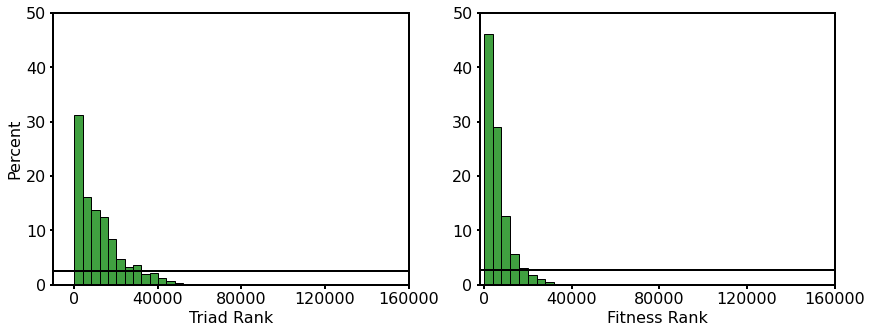

In [70]:
font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

plt.figure(figsize=(14, 5))
width = 4000
plt.subplot(1,2,1)
sns.histplot(merged['rank'], binwidth = width, color='g',stat='percent')
plt.xlim([-10000, 160000])
#uniform1 = 30720/(160000/width)
uniform1 = 100/(160000/width)
plt.axhline(uniform1, color='black')
plt.xticks([0, 40000, 80000, 120000, 160000])
plt.ylim([0, 50])
plt.xlabel('Triad Rank')

plt.subplot(1, 2, 2)
width =4000
sns.histplot(merged['fit_rank'], binwidth=width, color='g', stat='percent')
#uniform2 = 30720/(149361/width)
uniform2 = 100/(149361/width)
plt.axhline(uniform2, color='black')
plt.ylim([0, 50])
plt.xticks([0, 40000, 80000, 120000, 160000])
plt.xlabel('Fitness Rank')
plt.ylabel('')
#plt.savefig('histNNK.jpg', dpi=500, bbox_inches='tight')

Text(0.5, 46.0, 'Amino acid residue')

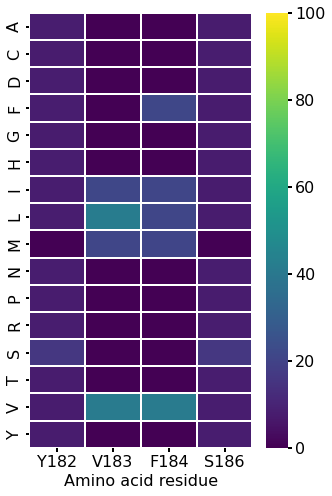

In [61]:
#labels = ['V39', 'D40', 'G41', 'V54']
labels = ['Y182', 'V183', 'F184', 'S186']

font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

sites_df = pd.DataFrame()
for i in range(4):
    sites_df[i] = [seq[i] for seq in best_df2['Combo'].values]

counts = sites_df.apply(pd.value_counts).fillna(0)/30720*100
#counts = counts.reindex(labels2)
plt.figure(figsize = (5, 8))
sns.heatmap(counts, vmin = 0, vmax = 100, xticklabels=labels, linewidths=2, cmap = 'viridis')
plt.xlabel('Amino acid residue')
#plt.savefig('AAs0.jpg', dpi=500)

In [11]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [12]:
pooled_df[0].nunique()
pooled_df[65].nunique()

4200

In [132]:
len(intersection(pooled_df[0].unique(), pooled_df[65].unique()))

908

plot the ranking of triad with distribution plots 
understand if the overlaps occur at high or low values

This visualization is weird. Maybe it would make more sense to numerically encode them and look at the kl divergence between distributions?

The diversity also suggests that screening larger libraries would be robust to preserving the high score, and that the libraries will be independent of one another.

### MLDE Simulation Analysis

In [1]:
results = np.load('/home/jyang4/repos/DeCOIL/MLDE_lite/saved/boosting_top_GB1/mlde_results.npy', allow_pickle=True)

#results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/boosting_swiftlib/mlde_results.npy', allow_pickle=True)

#results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/trpBA_ridge_nsamples/mlde_results.npy', allow_pickle=True)
#results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/boosting_top/mlde_results.npy', allow_pickle=True)

#results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/boosting_simple_stochastic_mixtop2/mlde_results.npy', allow_pickle=True)

maxes = results.item()['maxes']
means = results.item()['means']
ndcgs = results.item()['ndcgs']
top_seqs = results.item()['top_seqs']
labelled = results.item()['labelled']
unique = results.item()['unique']

#maxes2 = maxes.reshape(maxes.shape[2], maxes.shape[4]).T
#unique2 = unique.reshape(unique.shape[2], unique.shape[4]).T

#maxes2 = maxes[:,:,0,:,:].reshape(maxes.shape[3], maxes.shape[4]).T

maxes2 = maxes.reshape(maxes.shape[3], maxes.shape[4]).T
means2 = means.reshape(means.shape[3], means.shape[4]).T
ndcgs2 = ndcgs.reshape(ndcgs.shape[3], ndcgs.shape[4]).T
unique2 = unique.reshape(unique.shape[3], unique.shape[4]).T

NameError: name 'np' is not defined

In [3]:
seqs = results.item()['input_seqs']

In [4]:
seqs.shape

(1, 1, 1, 5, 70, 384)

In [13]:
maxes[0, 0, 0, 0, 11]

0.723981093746483

In [18]:
'FWAA' in  seqs[0,0, 0, 0, 8, :]

False

In [20]:
np.save('384.npy', seqs[0,0, 0, 0, 8, :])

In [ ]:
means = results.item()['means']

0.8215293779964572


Text(0.5, 0, 'Optimized Libraries')

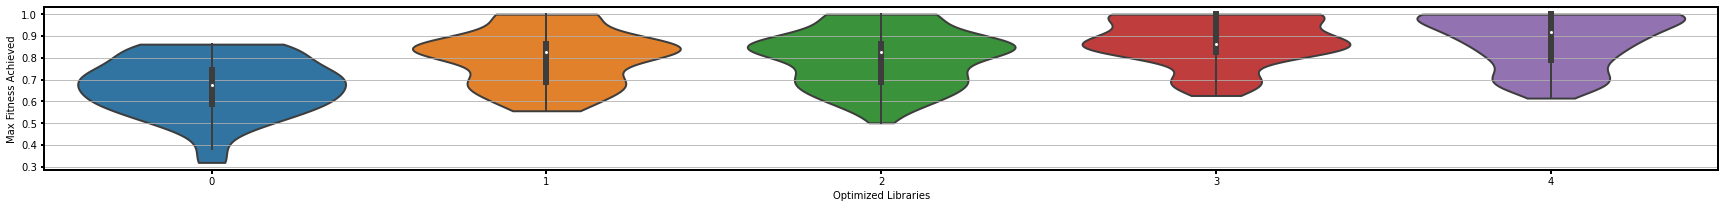

In [6]:
all_maxes_medians = np.median(maxes2, axis = 0).reshape(1, -1)
print(np.mean(all_maxes_medians))

plt.figure(figsize = (30, 3))
ax = sns.violinplot(data=maxes2, scale='width', cut=0)
#ax.set_xticklabels(['Random', 'Top 32000', 'Top 16000', 'Top 8000', 'Top 4000'])
#ax.set_xticklabels(['288', '336', '360', '372', '384'])
plt.grid(axis = 'y')
plt.ylabel('Max Fitness Achieved')
plt.xlabel('Optimized Libraries')
#plt.savefig('all_mix2_violin.jpg', dpi=500)

In [7]:
maxes2.shape

(70, 5)

In [26]:
# df = pd.DataFrame(columns=['model', 'threshold', 'max', 'mean', 'ndcg'])

# for maxes, means, ndcgs, threshold in zip(maxes2.T, means2.T, ndcgs2.T, ['random', '32000', '16000', '8000', '4000']):
#     for max, mean, ndcg in zip(maxes, means, ndcgs):
#         df.loc[len(df.index)] = ['gnn', threshold, max, mean, ndcg]

In [32]:
df = pd.DataFrame(columns=['n_samples', 'threshold', 'max', 'mean', 'ndcg'])

for i, threshold in enumerate(['random', '4000', '2000']):
    for j, n_samples in enumerate([24, 48, 96, 192, 384]):
        maxes2 = np.log10(maxes[0, 0, j, i, :])
        means2 = np.log10(means[0, 0, j, i, :])
        ndcgs2 = ndcgs[0, 0, j, i, :]
        for max, mean, ndcg in zip(maxes2, means2, ndcgs2):
            df.loc[len(df.index)] = [n_samples, threshold, max, mean, ndcg]

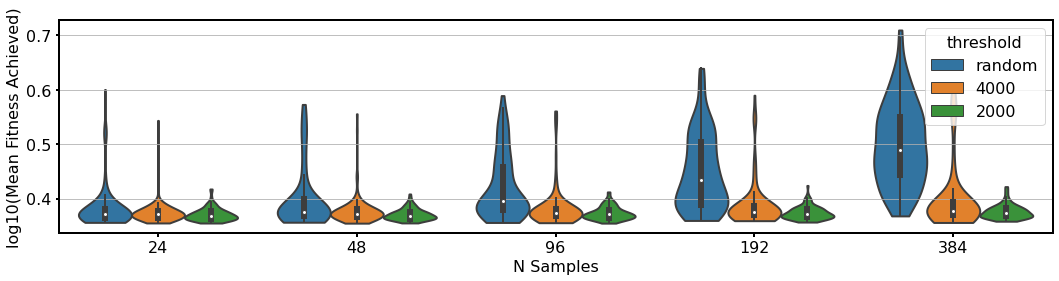

In [33]:
plt.figure(figsize = (15, 4))
plt.grid(axis = 'y')
sns.violinplot(data = df, x='n_samples', y ='ndcg', hue='threshold', scale='width', cut = 0)
plt.ylabel('log10(Mean Fitness Achieved)')
plt.xlabel('N Samples')
#plt.ylim([280, 384])
plt.tight_layout()
#plt.savefig('means_violin_libI.jpg', dpi=500)

In [35]:
df.to_csv('models_ftmlde_results.csv')

NameError: name 'df' is not defined

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


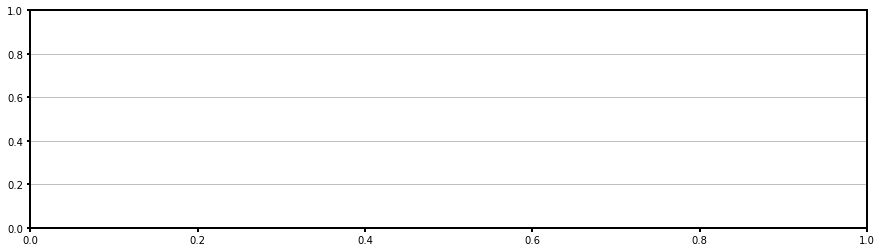

In [3]:
plt.figure(figsize = (15, 4))
plt.grid(axis = 'y')
sns.violinplot(data = df, x='threshold', y ='max', hue='model', scale='width', cut = 0)
plt.ylabel('Max Fitness Achieved')
plt.xlabel('Threshold (from TRIAD ranking)')
#plt.ylim([280, 384])
plt.tight_layout()
plt.savefig('maxes_violin.jpg', dpi=500)

SpearmanrResult(correlation=-0.5446445553744593, pvalue=5.788316405225363e-40)


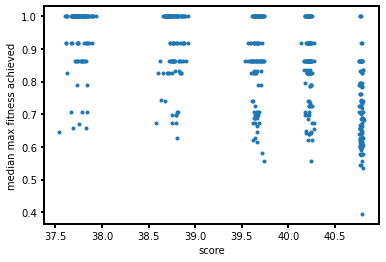

In [33]:
#for coverage analysis of random libraries
coverage_results = np.load('/home/jyang4/repos/StARDUST/coverage_unweighted_results_cnn_top.npy', allow_pickle=True)
scores, raw_scores, counts, diversity = coverage_results.item()['scores'], coverage_results.item()['raw_scores'], coverage_results.item()['counts'], coverage_results.item()['diversity']

x = scores.flatten()#[:100]
y = maxes2.T.flatten()#[:100]

plt.plot(x, y, '.')
plt.xlabel('score')
plt.ylabel('median max fitness achieved')
plt.legend
print(spearmanr(x, y))

In [42]:
df = pd.DataFrame(columns=['label', 'max', 'mean', 'ndcg'])

for i, label in enumerate(['mix1', 'mix2', 'mix3']):
    if label == 'mix1':
        results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/cnn_greedy_simple/mlde_results.npy', allow_pickle=True)
    else:
        results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/cnn_greedy_simple_' + label + '/mlde_results.npy', allow_pickle=True)
    maxes = results.item()['maxes']
    means = results.item()['means']
    ndcgs = results.item()['ndcgs']
    
    maxes2 = maxes.reshape(maxes.shape[3], maxes.shape[4]).T
    means2 = means.reshape(means.shape[3], means.shape[4]).T
    ndcgs2 = ndcgs.reshape(ndcgs.shape[3], ndcgs.shape[4]).T
    all_maxes_means = np.mean(maxes2, axis = 0)
    all_means_means = np.mean(means2, axis = 0)
    all_ndcgs_means = np.mean(ndcgs2, axis = 0)
    
    for max, mean, ndcg in zip(all_maxes_means, all_means_means, all_ndcgs_means):
        df.loc[len(df.index)] = [label, max, mean, ndcg]

results = np.load('/home/jyang4/repos/StARDUST/MLDE_lite/saved/supervised_cnn_top/mlde_results.npy', allow_pickle=True)
maxes = results.item()['maxes']
means = results.item()['means']
ndcgs = results.item()['ndcgs']

for i, label in enumerate(['Random', 'Top 32000', 'Top 16000', 'Top 8000', 'Top 4000']):
    
    maxes2 = maxes[0, 0, 0, i, :]
    means2 = means[0, 0, 0, i, :]
    ndcgs2 = ndcgs[0, 0, 0, i, :]
    
    for max, mean, ndcg in zip(maxes2, means2, ndcgs2):
        df.loc[len(df.index)] = [label, max, mean, ndcg]
df

,label,max,mean,ndcg
0,mix1,0.578303,0.176021,0.740566
1,mix1,0.635428,0.262936,0.758406
2,mix1,0.900622,0.361592,0.795971
3,mix1,0.938076,0.318162,0.778533
4,mix1,0.616047,0.205590,0.755026
...,...,...,...,...
735,Top 4000,1.000000,0.352026,0.784631
736,Top 4000,1.000000,0.335685,0.781255
737,Top 4000,1.000000,0.304675,0.797044
738,Top 4000,1.000000,0.362356,0.798986


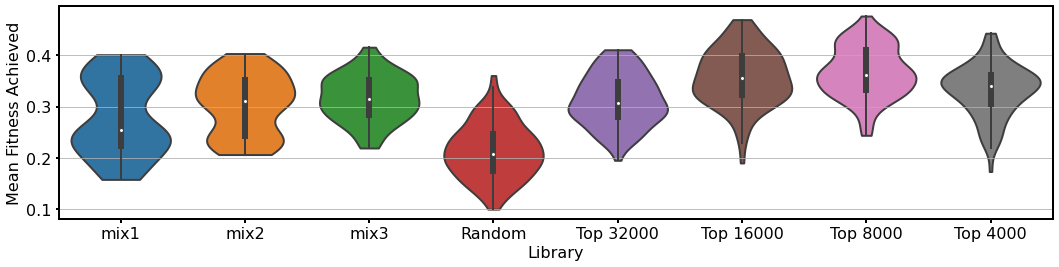

In [43]:
plt.figure(figsize = (15, 4))
plt.grid(axis = 'y')
sns.violinplot(data = df, x='label', y ='mean', scale='width', cut = 0)
plt.ylabel('Mean Fitness Achieved')
plt.xlabel('Library')
#plt.ylim([280, 384])
plt.tight_layout()
plt.savefig('means_violin.jpg', dpi=500)

(array([66.,  7.,  4.,  8.,  4.,  5.,  4.,  1.,  0.,  1.]),
 array([0.        , 0.03372886, 0.06745771, 0.10118657, 0.13491543,
        0.16864428, 0.20237314, 0.236102  , 0.26983085, 0.30355971,
        0.33728857]),
 <BarContainer object of 10 artists>)

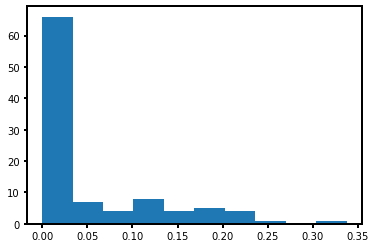

In [96]:
#try filtering by triad score after the model is trained
old_maxes = []
filtered_maxes = []
for i in range(100):
    seqs = top_seqs[0, 0, 0, 0, i, :]
    seqs = pd.DataFrame(seqs)
    seqs_df = seqs.merge(fitness_df, left_on=0, right_on='Combo')

    old_maxes.append(np.max(seqs_df[:96]['fit']))

    #take the stable ones first and then order the rest
    #filtered_seqs_df = pd.concat((seqs_df[seqs_df['triad_rank'] <= 40000], seqs_df[seqs_df['triad_rank'] > 40000]))
    filtered_seqs_df = seqs_df

    filtered_maxes.append(np.max(filtered_seqs_df[:192]['fit']))
differences = np.array(filtered_maxes) - np.array(old_maxes)
plt.hist(differences)

In [39]:
final_df = pd.DataFrame()
final_df['scores'] = final_means[:,0]
encodings_list = final_encodings.tolist()
final_df['encodings'] = encodings_list
#final_df['seqs'] =  final_df['encodings'].apply(encoding2seq)
final_df

,scores,encodings
0,0.618336,"[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ..."
1,0.616256,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, ..."
2,0.650071,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, ..."
3,0.635187,"[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, ..."
4,0.634984,"[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
...,...,...
95,0.625665,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, ..."
96,0.613650,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, ..."
97,0.613644,"[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ..."
98,0.642115,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ..."


In [40]:
top_indices = final_df.sort_values('scores', ascending=False)[:20].index

/home/jyang4/miniconda3/envs/ProtGraphR/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

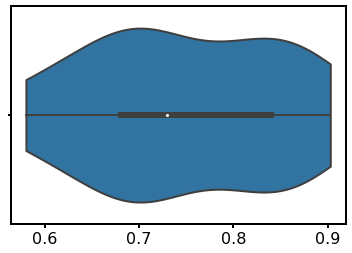

In [41]:
top_maxes = maxes[top_indices, :]
sns.violinplot(np.mean(top_maxes, axis = 1), cut=0)

In [42]:
np.mean(np.mean(top_maxes, axis = 1))

0.750140192641038

### Analyzing correlations between scores and library performance in MLDE

In [2]:
fitness_df = pd.read_csv('/home/jyang4/repos/StARDUST/data/GB1/fitness.csv')
fitness_df['fit'] = fitness_df['fit']/np.max(fitness_df['fit'].values)
fitness_df['triad_rank'] = fitness_df['Triad-FixedBb-dG'].rank(ascending=False)
cutoff = 149361
fitness_df = fitness_df.sort_values('Triad-FixedBb-dG', ascending=False)[:cutoff]
options = fitness_df.Combo.values

In [3]:
# results = np.load('dclo/saved/greedy_simple/results.npy', allow_pickle=True)
# means = results.item()['means']
# vars = results.item()['vars']
# Xts = results.item()['Xts'].astype(int)

# final_means = means[-1, :, :]
# final_vars = vars[-1, :, :]

# initial_encodings = Xts[0, :, :]
# final_encodings = Xts[-1, :, :]
# encoding2seq(final_encodings[0, :])

#initial libraries
results2 = np.load('dclo/saved/coverage_unweighted/results.npy', allow_pickle=True)
#single optimized
results3 = np.load('dclo/saved/coverage_unweighted_simple/results.npy', allow_pickle=True)

results4 = np.load('dclo/saved/coverage_unweighted_simple_mix2/results.npy', allow_pickle=True)

means2 = results2.item()['means']
final_means2 = means2[-1, :, :]

means3 = results3.item()['means']
final_means3 = means3[-1, :, :]

means4 = results4.item()['means']
final_means4 = means4[-1, :, :]

In [4]:
#to calculate coverage for a few library sizes
with open('/home/jyang4/repos/StARDUST/dclo/configs/coverage_unweighted_DEFAULT.json', 'r') as f:
    config = json.load(f)

all_scores = []
for n in [260, 380]:
    oracle = Oracle(config['data_config'], config['opt_config'], verbose = True)
    samples = fitness_df['Combo'].sample(n=n, random_state=42).values

    scores, raw_scores, counts, diversity, _ = oracle.aas2zs(samples)
    all_scores.append(scores)

In [28]:
df = pd.read_csv("/home/jyang4/repos/StARDUST/data/GB1/fitness.csv")
embeddings = np.load('data/GB1/ESM1b.npy')
dictionary = dict(zip(df["Combo"].values, embeddings))

In [30]:
dictionary['VDGV'].shape

(1280,)

#### mixed analysis

/home/jyang4/miniconda3/envs/ProtGraphR/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

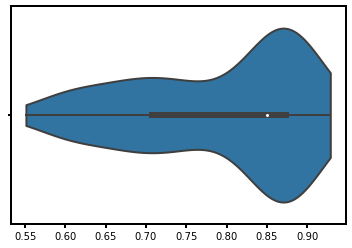

In [18]:
results = np.load('mlde_results_greedy_distance_tiered_mix.npy', allow_pickle=True)
maxes = results.item()['maxes']
maxes_mean = np.mean(maxes, axis = 1)

labelled = results.item()['labelled']
unique = results.item()['unique']
sns.violinplot(np.mean(maxes, axis = 1), cut=0)
#sns.violinplot(unique, cut=0)

In [12]:
import re
with open('pairs.txt') as f:
    lines = [line.rstrip('\n') for line in f]

new = []
for line in lines:
    line = re.findall(r'\d+', line)
    line = [int(ele) for ele in line]
    new.append(line)
pairs = np.array(new)

In [13]:
distances = []
score1 = []
score2 = []
for a , b in pairs:
    distances.append(hammingdistance(final_encodings[a,:], final_encodings[b,:]))
    score1.append(final_means[a,0])
    score2.append(final_means[b,0])
distances = np.array(distances)
score1 = np.array(score1)
score2 = np.array(score1)

SpearmanrResult(correlation=-0.05410356500747106, pvalue=0.5929089722412506)


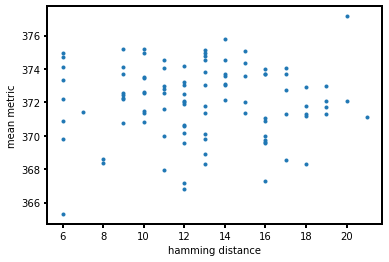

In [15]:
x = distances
#y = np.mean(maxes, axis = 1)
y = np.mean(unique, axis = 1)
plt.plot(x, y, '.')
plt.xlabel('hamming distance')
plt.ylabel('mean metric')
plt.legend
print(spearmanr(x, y))

SpearmanrResult(correlation=0.29257227904687305, pvalue=0.0031382594104065503)


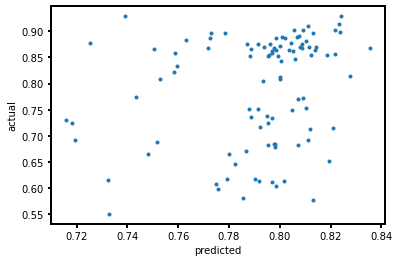

In [16]:
X = np.array([distances, score1, score2]).T
y = np.mean(maxes, axis = 1)

clf = LinearRegression()
clf.fit(X, y)
#clfs.append(clf)
y_preds = clf.predict(X)

x = y_preds
#y = maxes_mean


plt.plot(x, y, '.')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.legend
print(spearmanr(x, y))